# Data and returns

In [1]:
# Install and import pandas_datareader
import pandas as pd
import numpy as np
# !pip install --upgrade pandas-datareader
from pandas_datareader import DataReader as pdr
# !pip install --upgrade yfinance
import yfinance as yf
pd.options.display.float_format = '{:.2f}'.format

## Stock prices

In [2]:
# Pull stock information
ticker = 'AAPL'
df = yf.download('AAPL', start='2000-01-01', end='2020-12-31', progress=False)
df.index = df.index.to_period('D')
df

d:\bbcx-investments-quarto\quarto\venv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.94,1.00,0.91,1.00,0.85,535796800
2000-01-04,0.97,0.99,0.90,0.92,0.78,512377600
2000-01-05,0.93,0.99,0.92,0.93,0.79,778321600
2000-01-06,0.95,0.96,0.85,0.85,0.72,767972800
2000-01-07,0.86,0.90,0.85,0.89,0.76,460734400
...,...,...,...,...,...,...
2020-12-23,132.16,132.43,130.78,130.96,129.41,88223700
2020-12-24,131.32,133.46,131.10,131.97,130.40,54930100
2020-12-28,133.99,137.34,133.51,136.69,135.07,124486200


### Daily returns

In [3]:
pd.options.display.float_format = '{:.4f}'.format
ret = df['Adj Close'].pct_change()
ret

Date
2000-01-03       NaN
2000-01-04   -0.0843
2000-01-05    0.0146
2000-01-06   -0.0865
2000-01-07    0.0474
               ...  
2020-12-23   -0.0070
2020-12-24    0.0077
2020-12-28    0.0358
2020-12-29   -0.0133
2020-12-30   -0.0085
Freq: D, Name: Adj Close, Length: 5283, dtype: float64

### Monthly returns

In [4]:
# Keep just the last data adjusted close data point each month
df_monthly = df["Adj Close"].resample("M").last()
df_monthly

Date
2000-01     0.7896
2000-02     0.8724
2000-03     1.0337
2000-04     0.9442
2000-05     0.6393
            ...   
2020-08   127.2897
2020-09   114.2392
2020-10   107.3834
2020-11   117.6378
2020-12   132.1338
Freq: M, Name: Adj Close, Length: 252, dtype: float64

In [5]:
# Calculate a return
ret_monthly = df_monthly.pct_change()
ret_monthly

Date
2000-01       NaN
2000-02    0.1048
2000-03    0.1848
2000-04   -0.0865
2000-05   -0.3229
            ...  
2020-08    0.2166
2020-09   -0.1025
2020-10   -0.0600
2020-11    0.0955
2020-12    0.1232
Freq: M, Name: Adj Close, Length: 252, dtype: float64

In [6]:
ret_monthly.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Date', length=252)

In [7]:
ret_monthly.name

'Adj Close'

In [8]:
# Add a name to the series
ret_monthly.name = "ret"
ret_monthly

Date
2000-01       NaN
2000-02    0.1048
2000-03    0.1848
2000-04   -0.0865
2000-05   -0.3229
            ...  
2020-08    0.2166
2020-09   -0.1025
2020-10   -0.0600
2020-11    0.0955
2020-12    0.1232
Freq: M, Name: ret, Length: 252, dtype: float64

In [9]:
# Summary statistics
print(f'Avg monthly return:\t {ret_monthly.mean(): ,.4f}')
print(f'SD(monthly returns):\t {ret_monthly.std(): ,.4f}')

# annualized summary stats
print('\nAnnualized stats:')
print(f'Avg return:\t {ret_monthly.mean()*12: ,.4f}')
print(f'SD(return):\t {ret_monthly.std()*np.sqrt(12): ,.4f}')

Avg monthly return:	  0.0279
SD(monthly returns):	  0.1165

Annualized stats:
Avg return:	  0.3343
SD(return):	  0.4035


<AxesSubplot:xlabel='Date'>

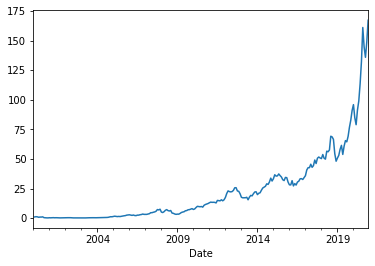

In [10]:
# Cumulative returns
(1+ret_monthly).cumprod().plot()

In [11]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=ret_monthly.index.to_timestamp("M"), y=(1+ret_monthly).cumprod(), mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [12]:
# Alternatively, monthly returns can be calculated by compounding daily rets
df['ret']= df['Adj Close'].pct_change()+1
df['year']=df.index.year
df['month']=df.index.month
df


,Open,High,Low,Close,Adj Close,Volume,ret,year,month
Date,,,,,,,,,
2000-01-03,0.9364,1.0045,0.9079,0.9994,0.8519,535796800,NaN,2000,1
2000-01-04,0.9665,0.9877,0.9035,0.9152,0.7801,512377600,0.9157,2000,1
2000-01-05,0.9263,0.9872,0.9196,0.9286,0.7915,778321600,1.0146,2000,1
2000-01-06,0.9475,0.9554,0.8482,0.8482,0.7230,767972800,0.9135,2000,1
2000-01-07,0.8616,0.9018,0.8527,0.8884,0.7573,460734400,1.0474,2000,1
...,...,...,...,...,...,...,...,...,...
2020-12-23,132.1600,132.4300,130.7800,130.9600,129.4066,88223700,0.9930,2020,12
2020-12-24,131.3200,133.4600,131.1000,131.9700,130.4046,54930100,1.0077,2020,12
2020-12-28,133.9900,137.3400,133.5100,136.6900,135.0686,124486200,1.0358,2020,12


In [13]:
mrets = df.groupby(['year','month'])['ret'].prod()-1
mrets = mrets.reset_index()
mrets

,year,month,ret
0,2000,1,-0.0731
1,2000,2,0.1048
2,2000,3,0.1848
3,2000,4,-0.0865
4,2000,5,-0.3229
...,...,...,...
247,2020,8,0.2166
248,2020,9,-0.1025
249,2020,10,-0.0600
250,2020,11,0.0955


In [14]:
# Convert date to PeriodIndex
mrets['date'] = pd.PeriodIndex(pd.to_datetime(mrets[['year','month']].assign(day=1)), freq='M')
mrets.index = mrets.date
mrets

,year,month,ret,date
date,,,,
2000-01,2000,1,-0.0731,2000-01
2000-02,2000,2,0.1048,2000-02
2000-03,2000,3,0.1848,2000-03
2000-04,2000,4,-0.0865,2000-04
2000-05,2000,5,-0.3229,2000-05
...,...,...,...,...
2020-08,2020,8,0.2166,2020-08
2020-09,2020,9,-0.1025,2020-09
2020-10,2020,10,-0.0600,2020-10


In [15]:
# Combine two methods of monthly returns and check correlation
df_joined = pd.merge(mrets['ret'],ret_monthly,left_index=True,right_index=True)
df_joined.corr()
# df_joined

,ret_x,ret_y
ret_x,1.0000,1.0000
ret_y,1.0000,1.0000


## Economic data from FRED

In [16]:
# 10-year Treasury Yield from FRED
y10 = pdr("DGS10", "fred", start="1929-12-01")

In [17]:
y10

,DGS10
DATE,
1962-01-02,4.0600
1962-01-03,4.0300
1962-01-04,3.9900
1962-01-05,4.0200
1962-01-08,4.0300
...,...
2023-01-13,3.4900
2023-01-16,NaN
2023-01-17,3.5300


<AxesSubplot:xlabel='DATE'>

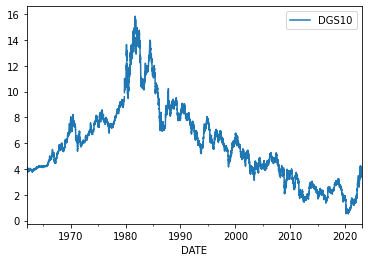

In [18]:
# A quick and dirty plot
y10.plot()

In [19]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=y10.index, y=y10.DGS10, mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

#### Data on equity portfolios from Ken French Data Library
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [20]:
# Some factors
ff3 = pdr('F-F_Research_Data_Factors','famafrench', start=1900)[0]/100
# Clean-up missings
for c in ff3.columns:
    ff3[c] = np.where(ff3[c]==-99.99, np.nan, ff3[c])

# Some industry portfolios
ff48 = pdr("48_Industry_Portfolios", "famafrench", start=1900)[0]
# Clean-up missings
for c in ff48.columns:
    ff48[c] = np.where(ff48[c]==-99.99, np.nan, ff48[c])
ff48 = ff48/100

In [21]:
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-07,0.0957,0.0281,-0.0410,0.0008
2022-08,-0.0377,0.0139,0.0031,0.0019
2022-09,-0.0935,-0.0082,0.0003,0.0019


In [22]:
# What does the following represent?
mrp = ff3['Mkt-RF'].mean()*12
print(f'The arithmetic average market risk premium (annualized): {mrp:.2%}')

The arithmetic average market risk premium (annualized): 8.09%


In [23]:
from scipy.stats import gmean

geomean = (gmean(1+ff3['Mkt-RF'])-1)*12
print(f'The geometric average market risk premium (annualized): {geomean:.2%}')

The geometric average market risk premium (annualized): 6.37%


In [24]:
ff48

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0237,0.0012,NaN,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0192,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0577,0.0520
1926-08,0.0223,0.0268,NaN,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,0.0032,0.0676
1926-09,-0.0057,0.0158,NaN,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0008,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0481,-0.0386
1926-10,-0.0046,-0.0368,NaN,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0262,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,-0.0094,-0.0849
1926-11,0.0675,0.0626,NaN,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0161,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0513,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07,0.0638,0.0368,0.0328,0.0549,0.0056,0.0563,0.1704,0.1208,0.0076,0.1186,...,0.0709,0.0933,0.0908,0.1633,0.1189,0.0854,0.0315,0.1410,0.1044,0.1001
2022-08,0.0523,-0.0046,-0.0440,-0.0187,-0.0012,-0.0577,-0.0226,-0.0500,-0.0216,-0.0601,...,-0.0911,-0.0146,-0.0160,-0.0346,-0.0147,-0.0341,-0.0084,-0.0612,-0.0102,-0.0403
2022-09,-0.0703,-0.0765,-0.0814,-0.0521,-0.1055,-0.1543,-0.0410,-0.1338,-0.1060,-0.1736,...,-0.1385,-0.1424,-0.0946,-0.0767,-0.0626,-0.0921,-0.0445,-0.1289,-0.0847,-0.0596


### Our own function to pull monthly returns data

In [25]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = yf.download(ticker, start='2000-01-01', end='2020-12-31', progress=False)
    ret.index = ret.index.to_period('D')
    ret = ret["Adj Close"].resample("M").last()
    ret = ret.pct_change()
    # ret.index = ret.index.to_period("M")
    ret.name = ticker
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

d:\bbcx-investments-quarto\quarto\venv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

d:\bbcx-investments-quarto\quarto\venv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

